In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datos_limpios_Amsterdam.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9659 non-null   int64  
 1   last_scraped                 9659 non-null   object 
 2   name                         9659 non-null   object 
 3   description                  9659 non-null   object 
 4   neighborhood_overview        9659 non-null   object 
 5   host_location                9659 non-null   object 
 6   host_response_time           9659 non-null   object 
 7   host_response_rate           9659 non-null   object 
 8   host_acceptance_rate         9659 non-null   object 
 9   host_is_superhost            9659 non-null   object 
 10  host_verifications           9659 non-null   object 
 11  host_has_profile_pic         9659 non-null   object 
 12  host_identity_verified       9659 non-null   object 
 13  neighbourhood     

In [4]:
dff=df
dff['room_type'] = dff['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [5]:
df1 = dff[dff["room_type"] ==3]

In [6]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y= df1['price']
X1= df1['room_type'].to_frame()

In [7]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Codigo para convertir un str en float
import re
Y= Y.apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [10]:
model.fit(X=X1, y=Y)

LinearRegression()

In [11]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(137.5)}

In [12]:
#Limpiar valores
import re
df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [13]:
#Predicciones
y_pred= model.predict(X=X1)
y_pred

array([137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5,
       137.5])

<Axes: xlabel='room_type', ylabel='price'>

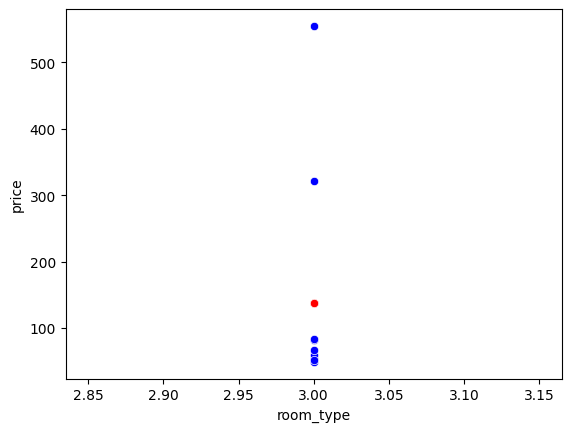

In [14]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [15]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [16]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [17]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [18]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [19]:
X2 = X2.replace({'%': ''}, regex=True).astype(float)

In [20]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [21]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-79.18604651]),
 'rank_': 1,
 'singular_': array([5.86515132]),
 'intercept_': np.float64(7945.2441860465115)}

In [22]:
#Limpiar valores
import re
df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [23]:
#Predicciones
y_pred2= model2.predict(X=X2)
y_pred2

array([422.56976744, 105.8255814 , 105.8255814 , 422.56976744,
        26.63953488,  26.63953488,  26.63953488, 105.8255814 ,
       105.8255814 ,  26.63953488])

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

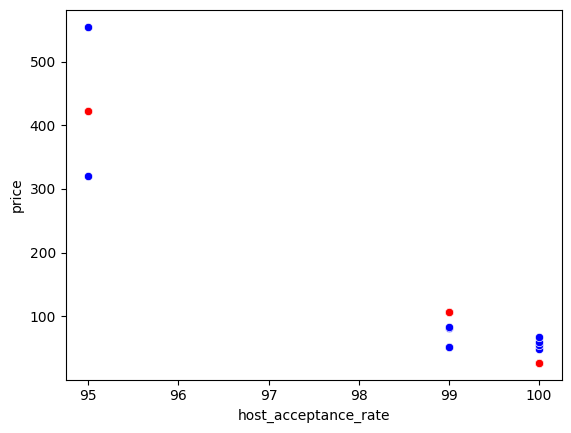

In [24]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [25]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.8477866871215302

In [26]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.9207533258813297)

In [27]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_7828\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [28]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_is_superhost'] != 'Without information']
Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [29]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [30]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [31]:
#Predicciones
y_pred3= model3.predict(X=X3)
y_pred3

array([137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5,
       137.5])

<Axes: xlabel='host_is_superhost', ylabel='price'>

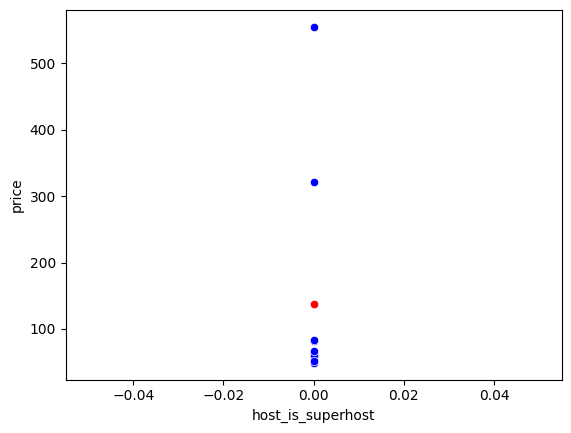

In [32]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [33]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.0

In [34]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.0)

In [35]:
#df1 = df1[df1['accommodates'] != 'Does not say']
#df1 = df1[df1['bathrooms'] != 'Without information']
Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [36]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [37]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [38]:
#Predicciones
y_pred4= model4.predict(X=X4)
y_pred4

array([1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7])

<Axes: xlabel='bathrooms', ylabel='accommodates'>

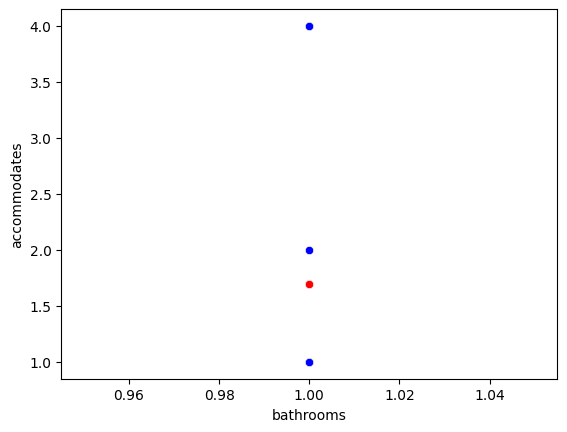

In [39]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [40]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.0

In [41]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.0)

In [42]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [43]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [44]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [45]:
#Limpiar valores
import re
df1['review_scores_cleanliness']= df1['review_scores_cleanliness'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [46]:
#Predicciones
y_pred5= model5.predict(X=X5)
y_pred5

array([179.17980202, 174.44346088, 138.92090234, 148.39358462,
       162.60260803, 146.02541405,  56.03493242, 172.07529031,
       164.9707786 ,  32.35322673])

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

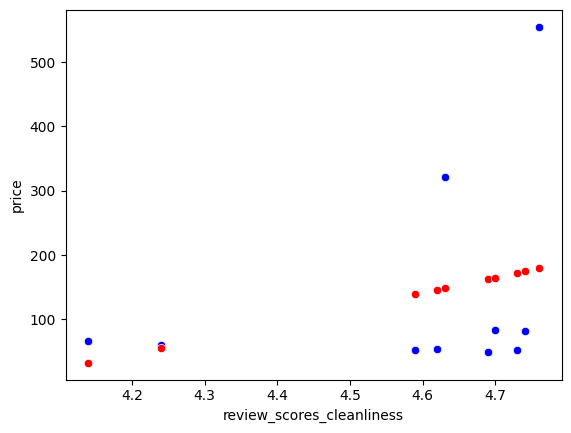

In [47]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [48]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

0.09263053566559043

In [49]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.3043526501701446)

In [50]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_7828\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [51]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_identity_verified'] != 'Nothing']
Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [52]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [53]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [54]:
#Predicciones
y_pred6= model6.predict(X=X6)
y_pred6

array([137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5, 137.5,
       137.5])

<Axes: xlabel='host_identity_verified', ylabel='price'>

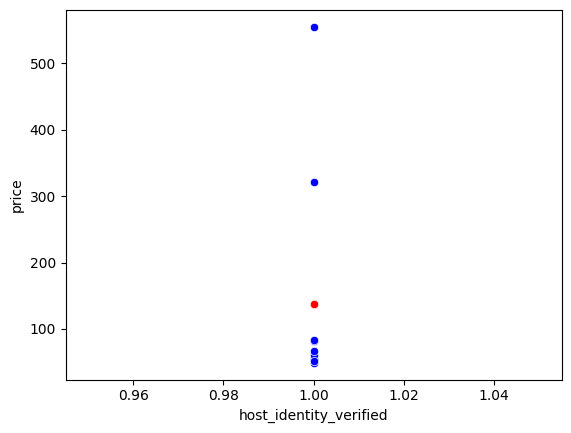

In [55]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [56]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.0

In [57]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.0)

In [58]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_7828\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [59]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['instant_bookable'] != 'Nothing']
Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [60]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [61]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [62]:
#Predicciones
y_pred7= model7.predict(X=X7)
y_pred7

array([438.   ,  62.375,  62.375, 438.   ,  62.375,  62.375,  62.375,
        62.375,  62.375,  62.375])

<Axes: xlabel='instant_bookable', ylabel='price'>

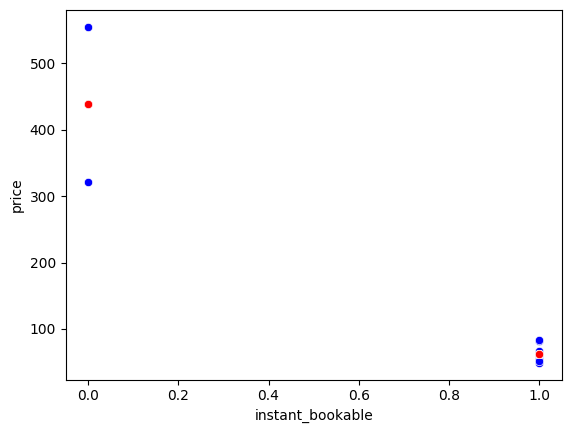

In [63]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [64]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.887278156510324

In [65]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.941954434413005)

In [78]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Entire home': 3,
    'Entire loft': 4,
    'Houseboat': 5,
    'Entire townhouse': 6,
    'Entire serviced apartment': 7,
    'Boat': 8,
    'Entire guest suite': 9,
    'Entire guesthouse': 10,
    'Entire place': 11,
    'Entire villa': 12,
    'Room in aparthotel': 13,
    'Entire vacation home': 14,
    'Tiny home': 15,
    'Entire cabin': 16,
    'Casa particular': 17,
    'Entire cottage': 18,
    'Camper/RV': 19,
    'Barn': 20,
    'Entire chalet': 21,
    'Shared room in houseboat':22,
    'Shared room in hostel':23,
    'Shared room in hotel':24
})

C:\Users\lapep\AppData\Local\Temp\ipykernel_7828\4027417952.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


In [79]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['property_type'] != 'Nothing']
Y8= df1['price']
X8= df1['property_type'].to_frame()

In [80]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [81]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [82]:
#Predicciones
y_pred8= model8.predict(X=X8)
y_pred8

array([322.75, 137.5 , 137.5 , 322.75, 137.5 , 137.5 , 137.5 , -47.75,
       -47.75, 137.5 ])

<Axes: xlabel='property_type', ylabel='price'>

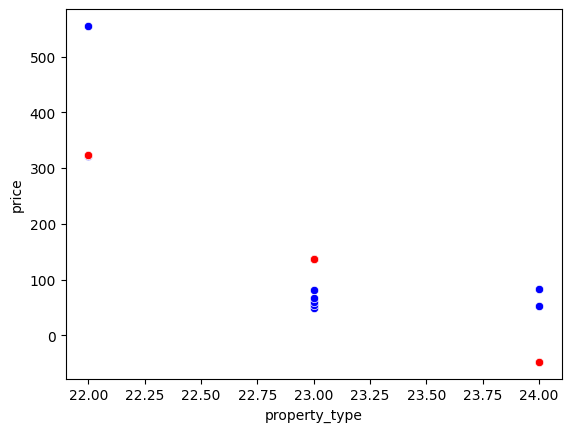

In [83]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [84]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.5395196330628624

In [85]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.7345200018126549)

In [86]:
#Declaramos las variables dependientes e independientes para la regresión lineal 
Vars_Indep = df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']]
Var_Dep = df1[['price']]

In [87]:
#Declaramos las variables dependientes e independientes para la regresión lineal accommodates vs bathrooms
Vars_Indep2= df1 [['bathrooms']]
Var_Dep2 = df1[['accommodates']]

In [88]:
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model10= LinearRegression()
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [89]:
model9.fit(X=Vars_Indep, y=Var_Dep)
model10.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [90]:
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
        'host_identity_verified', 'host_is_superhost', 'instant_bookable',
        'property_type'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[ 0.00000000e+00,  4.46631806e+01,  1.33082129e+00,
         -2.84217094e-14,  1.13686838e-13, -3.73250231e+02,
         -1.73315903e+00]]),
 'rank_': 4,
 'singular_': array([6.16219549e+00, 1.46355050e+00, 5.19701791e-01, 1.88458925e-01,
        3.03785876e-17, 2.15293082e-17, 0.00000000e+00]),
 'intercept_': array([140.00784374])}

In [91]:
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.]]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': array([1.7])}

In [92]:
y_pred= model9.predict(X=df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
y_pred

array([[440.90310674],
       [ 70.34973854],
       [ 63.65026146],
       [435.09689326],
       [ 69.4474008 ],
       [ 66.32097816],
       [ 49.34896955],
       [ 68.16994771],
       [ 66.83005229],
       [ 44.88265149]])

In [93]:
# Lista de columnas a conservar
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar el DataFrame para conservar solo esas columnas
df1= df1[columnas_a_conservar]

In [94]:
#insertamos la columna de predicciones en el DataFrame 
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
857,440.903107,555.0,3,4.76,95.0,1,0,0,4.0,1.0,22
1647,70.349739,82.0,3,4.74,99.0,1,0,1,1.0,1.0,23
4849,63.650261,52.0,3,4.59,99.0,1,0,1,1.0,1.0,23
6588,435.096893,321.0,3,4.63,95.0,1,0,0,4.0,1.0,22
7038,69.447401,49.0,3,4.69,100.0,1,0,1,1.0,1.0,23
7855,66.320978,54.0,3,4.62,100.0,1,0,1,1.0,1.0,23
8213,49.348970,60.0,3,4.24,100.0,1,0,1,1.0,1.0,23
8718,68.169948,52.0,3,4.73,99.0,1,0,1,1.0,1.0,24
8719,66.830052,83.0,3,4.70,99.0,1,0,1,2.0,1.0,24
8959,44.882651,67.0,3,4.14,100.0,1,0,1,1.0,1.0,23


In [95]:
y_pred2= model10.predict(X=df1[['bathrooms']])
y_pred2

array([[1.7],
       [1.7],
       [1.7],
       [1.7],
       [1.7],
       [1.7],
       [1.7],
       [1.7],
       [1.7],
       [1.7]])

In [96]:
df1.insert(1, 'Predicciones2', y_pred2)
df1

,Predicciones,Predicciones2,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
857,440.903107,1.7,555.0,3,4.76,95.0,1,0,0,4.0,1.0,22
1647,70.349739,1.7,82.0,3,4.74,99.0,1,0,1,1.0,1.0,23
4849,63.650261,1.7,52.0,3,4.59,99.0,1,0,1,1.0,1.0,23
6588,435.096893,1.7,321.0,3,4.63,95.0,1,0,0,4.0,1.0,22
7038,69.447401,1.7,49.0,3,4.69,100.0,1,0,1,1.0,1.0,23
7855,66.320978,1.7,54.0,3,4.62,100.0,1,0,1,1.0,1.0,23
8213,49.348970,1.7,60.0,3,4.24,100.0,1,0,1,1.0,1.0,23
8718,68.169948,1.7,52.0,3,4.73,99.0,1,0,1,1.0,1.0,24
8719,66.830052,1.7,83.0,3,4.70,99.0,1,0,1,2.0,1.0,24
8959,44.882651,1.7,67.0,3,4.14,100.0,1,0,1,1.0,1.0,23


In [97]:
coef_Deter9= model9.score(X=Vars_Indep, y=Var_Dep)
coef_Deter9

0.8899380460923376

In [98]:
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.9433652771288212)

In [99]:
coef_Deter10= model10.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter10

0.0

In [100]:
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.0)

In [101]:
df1['predicted_price'] = model9.predict(df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
df1['predicted_accommodates'] = model10.predict(df1[['bathrooms']])

In [102]:
df1= df1.drop(['room_type'], axis=1)

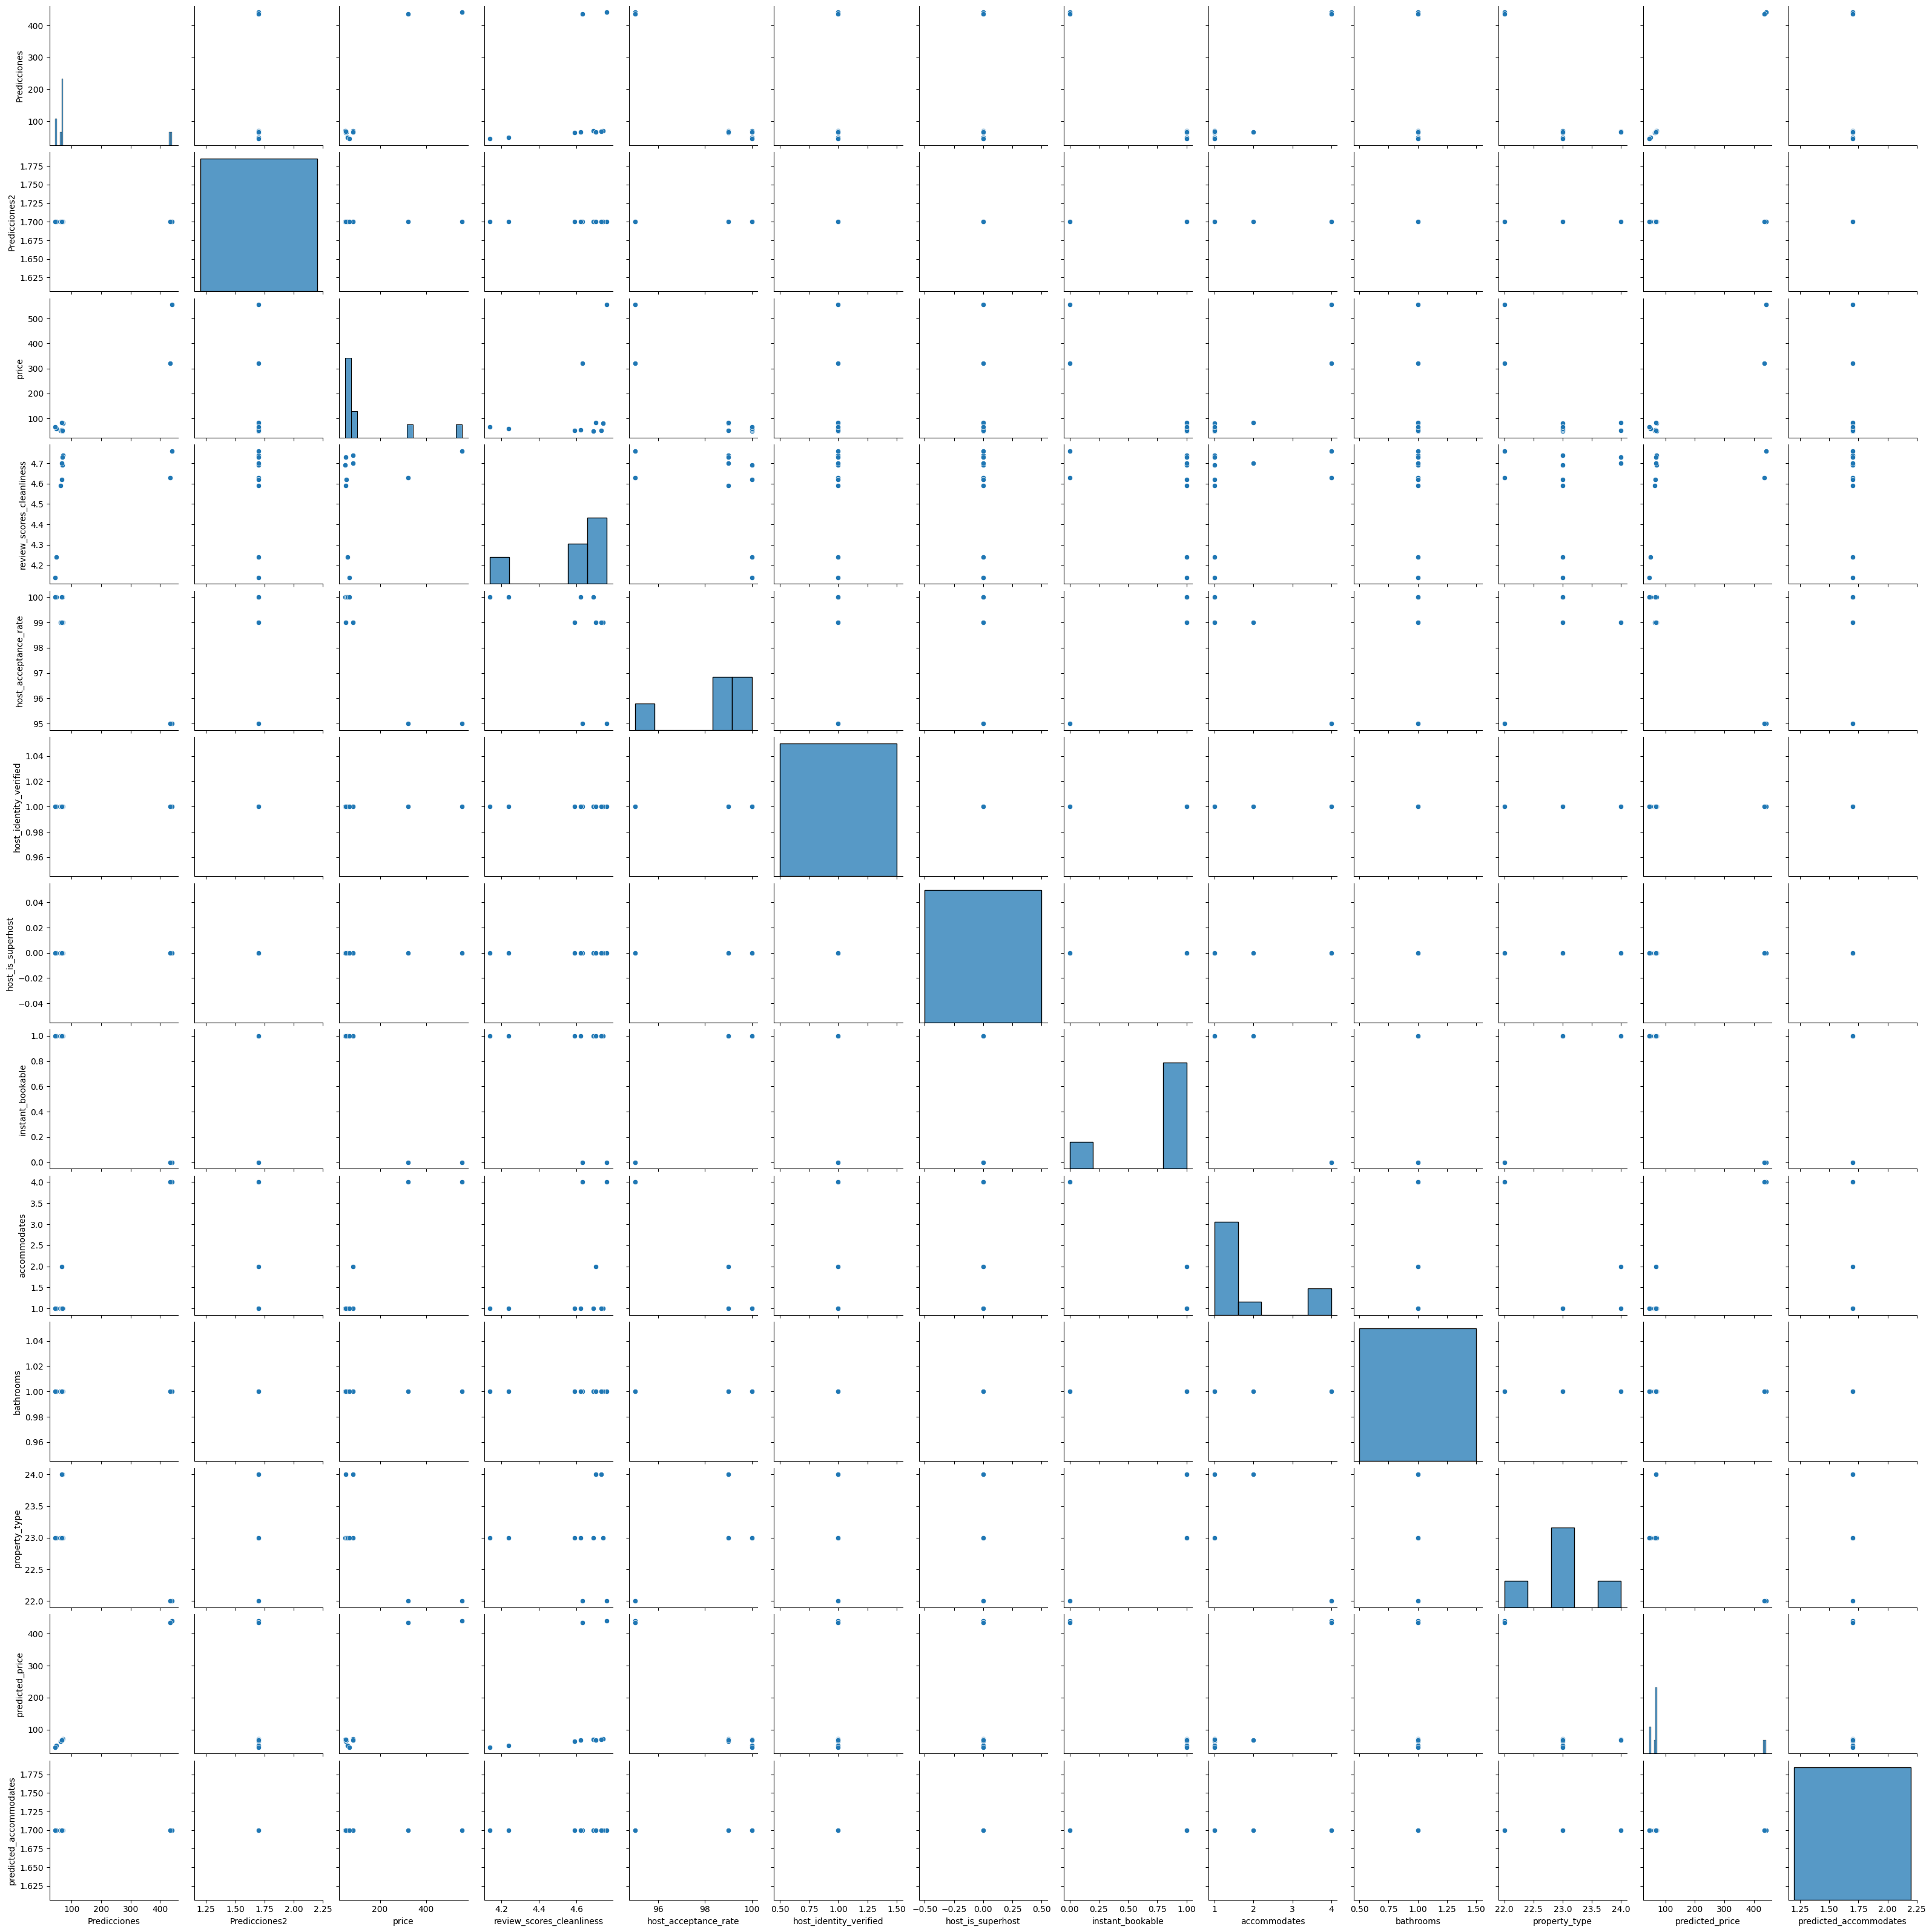

In [103]:
sns.pairplot(df1)

In [104]:
Corr_Factors9= df1.corr()
Corr_Factors9

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.943365,0.322624,-0.976031,NaN,NaN,-0.998504,0.969520,NaN,-0.778617,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.943365,NaN,1.000000,0.304353,-0.920753,NaN,NaN,-0.941954,0.923148,NaN,-0.734520,0.943365,NaN
review_scores_cleanliness,0.322624,NaN,0.304353,1.000000,-0.403457,NaN,NaN,-0.270735,0.321254,NaN,0.030852,0.322624,NaN
host_acceptance_rate,-0.976031,NaN,-0.920753,-0.403457,1.000000,NaN,NaN,0.970495,-0.962603,NaN,0.681994,-0.976031,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,-0.998504,NaN,-0.941954,-0.270735,0.970495,NaN,NaN,1.000000,-0.968475,NaN,0.790569,-0.998504,NaN
accommodates,0.969520,NaN,0.923148,0.321254,-0.962603,NaN,NaN,-0.968475,1.000000,NaN,-0.665780,0.969520,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
Corr_Factors10= abs(Corr_Factors9)
Corr_Factors10

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.943365,0.322624,0.976031,NaN,NaN,0.998504,0.969520,NaN,0.778617,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.943365,NaN,1.000000,0.304353,0.920753,NaN,NaN,0.941954,0.923148,NaN,0.734520,0.943365,NaN
review_scores_cleanliness,0.322624,NaN,0.304353,1.000000,0.403457,NaN,NaN,0.270735,0.321254,NaN,0.030852,0.322624,NaN
host_acceptance_rate,0.976031,NaN,0.920753,0.403457,1.000000,NaN,NaN,0.970495,0.962603,NaN,0.681994,0.976031,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,0.998504,NaN,0.941954,0.270735,0.970495,NaN,NaN,1.000000,0.968475,NaN,0.790569,0.998504,NaN
accommodates,0.969520,NaN,0.923148,0.321254,0.962603,NaN,NaN,0.968475,1.000000,NaN,0.665780,0.969520,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

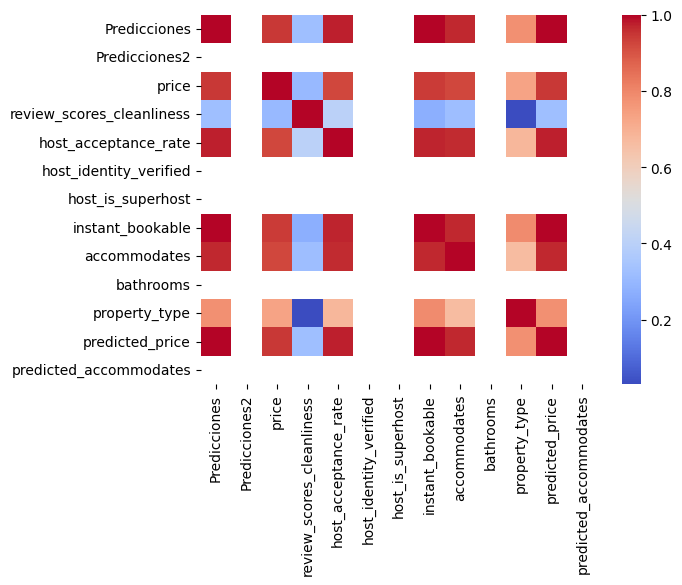

In [106]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'coolwarm')
Heart_Nap

<Axes: >

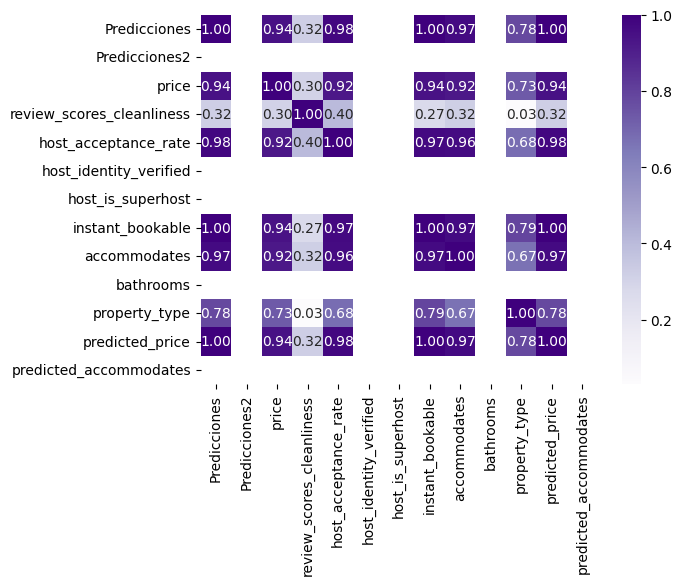

In [107]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [108]:
Corr_Factors11 = df1.corr()
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.943365,0.322624,-0.976031,NaN,NaN,-0.998504,0.969520,NaN,-0.778617,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.943365,NaN,1.000000,0.304353,-0.920753,NaN,NaN,-0.941954,0.923148,NaN,-0.734520,0.943365,NaN
review_scores_cleanliness,0.322624,NaN,0.304353,1.000000,-0.403457,NaN,NaN,-0.270735,0.321254,NaN,0.030852,0.322624,NaN
host_acceptance_rate,-0.976031,NaN,-0.920753,-0.403457,1.000000,NaN,NaN,0.970495,-0.962603,NaN,0.681994,-0.976031,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,-0.998504,NaN,-0.941954,-0.270735,0.970495,NaN,NaN,1.000000,-0.968475,NaN,0.790569,-0.998504,NaN
accommodates,0.969520,NaN,0.923148,0.321254,-0.962603,NaN,NaN,-0.968475,1.000000,NaN,-0.665780,0.969520,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
Corr_Factors11= abs(Corr_Factors9)
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.943365,0.322624,0.976031,NaN,NaN,0.998504,0.969520,NaN,0.778617,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.943365,NaN,1.000000,0.304353,0.920753,NaN,NaN,0.941954,0.923148,NaN,0.734520,0.943365,NaN
review_scores_cleanliness,0.322624,NaN,0.304353,1.000000,0.403457,NaN,NaN,0.270735,0.321254,NaN,0.030852,0.322624,NaN
host_acceptance_rate,0.976031,NaN,0.920753,0.403457,1.000000,NaN,NaN,0.970495,0.962603,NaN,0.681994,0.976031,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,0.998504,NaN,0.941954,0.270735,0.970495,NaN,NaN,1.000000,0.968475,NaN,0.790569,0.998504,NaN
accommodates,0.969520,NaN,0.923148,0.321254,0.962603,NaN,NaN,0.968475,1.000000,NaN,0.665780,0.969520,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


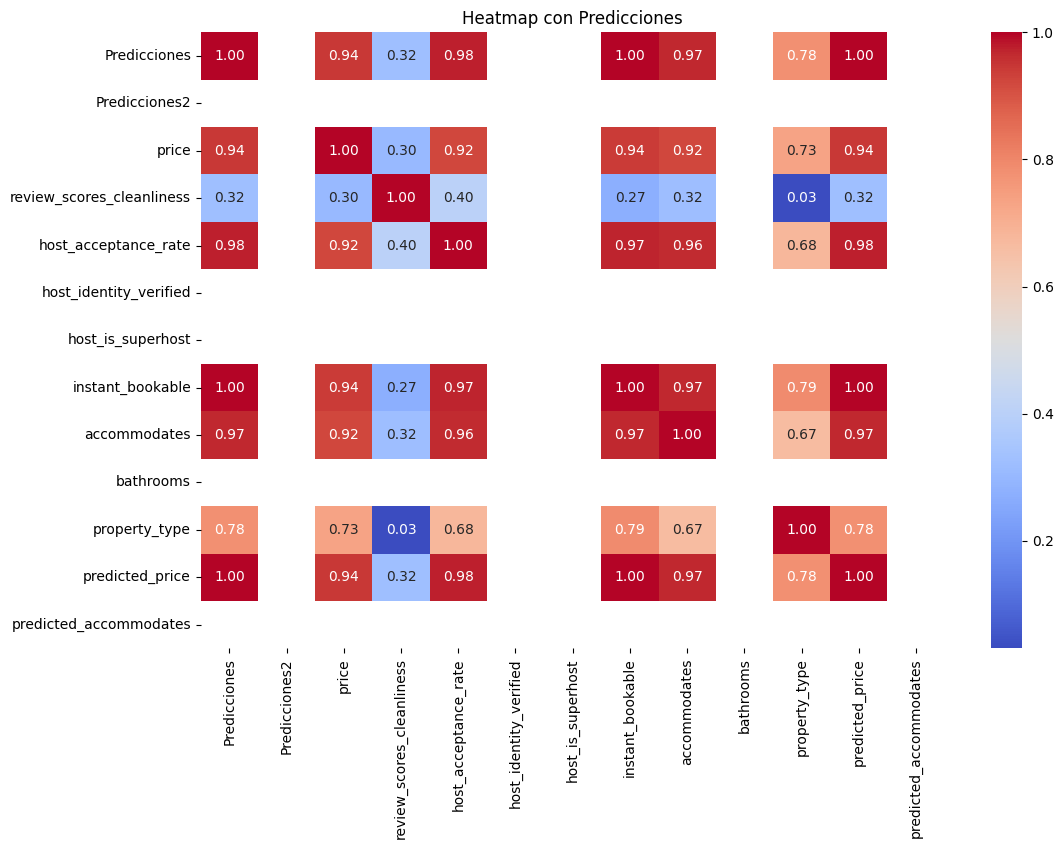

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors11, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()